In [7]:
import random
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from gensim import models
from gensim.corpora.dictionary import Dictionary
from Bio.Cluster import kcluster
from sklearn import svm
from sklearn.model_selection import train_test_split
from tqdm import tqdm



ZONE_NUM = 592
TOPIC_NUM = 200

zone_vec_dim = TOPIC_NUM

#svm分割尺寸
TRAIN_SIZE = 0.6
TEST_SIZE = 1 - TRAIN_SIZE

path_to_poi = r'data/BJCY_5/bjcy592_pois.txt'
path_to_label = r'data/BJCY_5/bjcy592_label9.txt'
vec_path = r'data\LDA\vec'


In [4]:
from tqdm import tqdm

zones = [[] for _ in range(ZONE_NUM)]
print(len(zones))
# print(zones)
# 读入csv文件
with open(path_to_poi, 'r', encoding='utf-8') as f:
    print(f.readline())
    for line in tqdm(f.readlines()):
        line = line.strip('\n').split(',')
        zones[eval(line[4])].append(line[1])
print(len(zones))
zones

592
FID,type2,lon,lat,zoneID


100%|██████████| 177165/177165 [00:01<00:00, 127470.25it/s]


592


[['道路名',
  '路口名',
  '汽车租赁',
  '汽车维修',
  '洗车场',
  '汽车销售',
  '村庄级地名',
  '公证鉴定机构',
  '公司',
  '公司',
  '便民商店/便利店',
  '公共厕所',
  '路口名',
  '公交车站相关',
  '摄影冲印',
  '政府机关相关',
  '政府机关相关',
  '加油站',
  '生活服务场所',
  '公司',
  '公共厕所',
  '公共厕所',
  '建材五金市场',
  '建材五金市场',
  '公司',
  '路口名',
  '路口名',
  '高速路出口',
  '餐饮相关',
  '公司',
  '路口名',
  '道路名',
  '路口名',
  '公园',
  '路口名',
  '紧急避难场所',
  '路口名',
  '休闲场所',
  '路口名',
  '公司',
  '公共停车场',
  '专营店',
  '汽车服务相关',
  '汽车服务相关',
  '工厂',
  '工厂',
  '公园',
  '公共停车场',
  '诊所',
  '停车场相关',
  '诊所',
  '公共厕所',
  '餐饮相关',
  '专营店',
  '专营店',
  '美容美发店',
  '公共停车场',
  '公共厕所',
  '公园',
  '公司',
  '公园',
  '紧急避难场所',
  '路口名',
  '道路名',
  '美术馆',
  '商务写字楼',
  '厨卫市场',
  '公司',
  '科研机构',
  '汽车服务相关',
  '建材五金市场',
  '公共厕所',
  '城市快速路入口'],
 ['建筑公司',
  '公交车站相关',
  '中国石化',
  '地名地址信息',
  '专用停车场',
  '购物相关场所',
  '超市',
  '超市',
  '便民商店/便利店',
  '生活服务场所',
  '生活服务场所',
  '便民商店/便利店',
  '美容美发店',
  '美容美发店',
  '物流速递',
  '楼栋号',
  '美容美发店',
  '美容美发店',
  '美容美发店',
  '路口名',
  '楼栋号',
  '楼栋号',
  '公交车站相关',
  '住宅小区',
  '地名地址信息',
  '地名地址信息

In [25]:
from gensim.corpora import Dictionary
from gensim.models import  ldamodel
#训练lda模型

corpus_ = zones  # 空的会被跳过
dictionary = Dictionary(corpus_)  # 字典
corpus = [dictionary.doc2bow(text) for text in corpus_]
lda = models.ldamodel.LdaModel(corpus = corpus, id2word = dictionary,alpha=0.01, eta= 0.1 ,iterations=300, num_topics = TOPIC_NUM)

#corpus语料库   id2word从单词ID到单词的映射  num_topic要求从训练语料库中提取的潜在主题的数量
#iterations推断语料库的主题分布时，通过语料库的最大迭代次数。  passes训练期间通过语料库的次数

print(lda)
# 打印模型的参数
print("Alpha参数:", lda.alpha)
print("Beta参数:", lda.eta)

# lda = ldamodel.LdaModel.load('lda.model')# 生成

LdaModel<num_terms=592, num_topics=200, decay=0.5, chunksize=2000>
Alpha参数: [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 

In [26]:
def saveVectors(A,path,label=''):
    f=open(path,"w",encoding = "utf-8")

    rowCount=len(A)
    colCount=len(A[0])

    headline=str(rowCount)+' '+str(colCount)+'\n'
    f.write(headline)


    for i in range(0,rowCount):
        line=label+str(i)+' '
        for j in range(0,colCount):
            line+=str(A[i][j])
            if j!=(colCount-1):
                line+=' '
        f.write(line+'\n')
    f.close()
    print('save successful:'+path)


def save_topiclist(topiclist):
    #save all topic to file
    # f = open(r"G:\word2vec\data\topiclist"+str(topicNUM)+".txt","w",encoding = "utf-8")
    #获取每个主题包含的单词及其概率
    topics_word_name=[] #二维数组，行数是topic个数，每一行数据中存储一个topic中的全部word name
    topics_word_prob=[] #二维数组，行数是topic个数，每一行数据中存储一个topic中的全部word probability
    j=0
    for topic in topiclist:
        # 每一条topic的形式如下：
        # (99, '0.105*"公司" + 0.076*"中餐厅" + 0.032*"住宅小区" + 0.032*"便民商店/便利店" + 0.024*"日本料理"')
        #tipic[0]是topic id, 用Array index表示
        str1 = topic[1].strip().split('+') #[0.105*"公司", 0.076*"中餐厅", 0.032*"住宅小区", 0.032*"便民商店/便利店", 0.024*"日本料理"]
        wordname=[]
        wordprob=[]
        for wordinfo in str1:
            str2 = wordinfo.strip().split('*')
            wordname.append(str2[1].strip('"'))
            wordprob.append(eval(str2[0]))
        topics_word_name.append(wordname)
        topics_word_prob.append(wordprob)
    path1=vec_path+"\\topiclist_wordname.txt"
    path2=vec_path+"\\topiclist_wordprob.txt"
    saveVectors(topics_word_name, path1, 'topic')
    saveVectors(topics_word_prob, path2, 'topic')
    print('write topic list over')

def saveArray(A,path,label=''):
    f=open(path,"w",encoding = "utf-8")
    f.write('NO HEAD\n')
    rowCount=len(A)
    for i in range(0,rowCount):
        line=label+str(i)+' '
        colCount=len(A[i])
        j=0
        while j<colCount:
            line+=str(A[i][j])
            if j!=(colCount-1):
                line+=' '
            j=j+1
        f.write(line+'\n')
    f.close()
    print('save successful:'+path)


def save_zonelist(zone_topic_word_list):
    zone_topic_no = []
    zone_topic_prob = []

    # 0 62,0.12629813 131,0.73684543 157,0.04271085 170,0.06823405
    for zone in zone_topic_word_list:
        zone_topics = zone[0]

        topic_no = []
        topic_prob = []
        for topic in zone_topics:
            topic_no.append('topic'+ str(topic[0]))
            topic_prob.append(topic[1])
        zone_topic_no.append(topic_no)
        zone_topic_prob.append(topic_prob)
    path1 = vec_path+"\\zone_topic_no.txt"
    path2 = vec_path+"\\zone_topic_prob.txt"

    saveArray(zone_topic_no, path1, 'zone')
    saveArray(zone_topic_prob, path2, 'zone')
    print('over')

In [27]:
topiclist = lda.print_topics(TOPIC_NUM ,num_words=20)
topiclist

[(0,
  '0.086*"家具城" + 0.072*"公司" + 0.069*"家居建材市场" + 0.049*"建材五金市场" + 0.034*"楼栋号" + 0.027*"充电宝" + 0.027*"中餐厅" + 0.026*"生活服务场所" + 0.026*"厨卫市场" + 0.025*"专营店" + 0.025*"培训机构" + 0.019*"购物相关场所" + 0.015*"美容美发店" + 0.015*"商务写字楼" + 0.014*"餐饮相关" + 0.014*"公司企业" + 0.014*"路口名" + 0.011*"布艺市场" + 0.011*"科教文化场所" + 0.011*"快餐厅"'),
 (1,
  '0.050*"中餐厅" + 0.041*"旅馆招待所" + 0.039*"便民商店/便利店" + 0.035*"商务住宅相关" + 0.031*"公共厕所" + 0.028*"公司" + 0.023*"超市" + 0.022*"餐饮相关" + 0.021*"生活服务场所" + 0.019*"建材五金市场" + 0.018*"乡镇以下级政府及事业单位" + 0.018*"蔬菜市场" + 0.017*"快餐厅" + 0.015*"政府机关相关" + 0.014*"区县级政府及事业单位" + 0.014*"村庄级地名" + 0.014*"美容美发店" + 0.013*"物流速递" + 0.010*"手机销售" + 0.010*"特色/地方风味餐厅"'),
 (2,
  '0.002*"华夏银行ATM" + 0.002*"中信银行" + 0.002*"广汽三菱维修" + 0.002*"免税品店" + 0.002*"残障洗手间/无障碍洗手间" + 0.002*"溜冰场" + 0.002*"知名企业" + 0.002*"苏宁" + 0.002*"评估事务所" + 0.002*"台湾菜" + 0.002*"检察院" + 0.002*"游戏厅" + 0.002*"山" + 0.002*"国家级景点" + 0.002*"教堂" + 0.002*"商场" + 0.002*"摄影器材店" + 0.002*"中国太平洋保险" + 0.002*"交通地名" + 0.002*"高尔夫用品店"'),
 (3,
  '0.344*"楼栋号" + 0.044*"公司" +

In [28]:
all_topics = lda.get_document_topics(corpus, per_word_topics=True, minimum_probability=0)
# save_zonelist(all_topics)
print(all_topics)


doc_topic = []

# 循环迭代all_topics
for docInfo in all_topics:
    docTopics = docInfo[0]
    temp_list = []  # 创建一个临时列表用于存储当前文档的主题概率
    for topic in docTopics:
        temp_list.append(topic[1])  # 将每个主题的概率添加到临时列表
    doc_topic.append(temp_list)  # 将临时列表添加到doc_topic
print("doc_topic 获取完毕")


## 写入文件
with open(vec_path+'\doc_topic.txt', 'w', encoding = 'utf-8') as f:
    for line in doc_topic:
        line = [str(i) for i in line]
        f.write(' '.join(line))
        f.write('\n')
    f.close()

doc_topic 获取完毕


##### 平均相似度计算

##### 预处理以进行SVM

In [29]:
def process_zoneVec_file(zoneVec_path, label_path, output_path):
    # 读取标签文件
    with open(label_path, 'r') as label_file:
        labels = label_file.readlines()
        labels = [label.strip() for label in labels]

    # 读取并处理 zoneVec 文件
    with open(zoneVec_path, 'r') as zoneVec_file:
        lines = zoneVec_file.readlines()
        lines = [line.strip().split() for line in lines]

    # 并且将空格替换为逗号
    zoneVec_data = [','.join(line[0:]) for line in lines[0:]]

    # 合并标签并写入输出文件
    with open(output_path, 'w') as output_file:
        for i, zoneVec_row in enumerate(zoneVec_data):
            label = labels[i] if i < len(labels) else ''
            output_file.write(zoneVec_row + ',' + label + '\n')


zonevec_path = r'data\LDA\vec\doc_topic.txt'
label_path = path_to_label
zonevecwithlabel_output_path = r'data\LDA\vec\zonevecwithlabel.txt'
# 执行处理
process_zoneVec_file(zonevec_path, label_path, zonevecwithlabel_output_path)

In [30]:
import pandas as pd

PATH_TO_SVMVEC = r'.\data\LDA\lda'

PATH_TO_SVMRES = r'.\data\LDA\SVM'

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# define converts(字典)
def create_iris_label_dict():
    it = {}
    for i in range(50):
        it[bytes(str(i), 'utf-8')] = i
    return it

def Iris_label(s):
    iris_dict = create_iris_label_dict()
    return iris_dict[s]

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 1.读取数据集
path = zonevecwithlabel_output_path
data = np.loadtxt(path, dtype=float, delimiter=',',  converters={zone_vec_dim: Iris_label})

# 2. 划分数据与标签
x, y = np.split(data, indices_or_sections=(zone_vec_dim,), axis=1)  # x为数据，y为标签
x = x[:, 0:zone_vec_dim]
train_data, test_data, train_label, test_label, train_indices, test_indices = train_test_split(
    x, y, range(len(y)), random_state=1, train_size=TRAIN_SIZE, test_size=TEST_SIZE
)

# 3.训练svm分类器
classifier = svm.SVC(C=100, kernel='rbf', gamma=3, decision_function_shape='ovo')  # ovr:一对多策略
classifier.fit(train_data, train_label.ravel())  # ravel函数在降维时 默认是行序优先
#kernel='linear'时，为线性核，C越大分类效果越好，但有可能会过拟合（defaul C=1）。
#kernel='rbf'时（default），为高斯核，gamma值越小，分类界面越连续；gamma值越大，分类界面越“散”，分类效果越好，但有可能会过拟合。
#decision_function_shape='ovr'时，为one v rest（一对多），即一个类别与其他类别进行划分，
#decision_function_shape='ovo'时，为one v one（一对一），即将类别两两之间进行划分，用二分类的方法模拟多分类的结果。

# 4.计算svc分类器的准确率
# print(len(train_data))
# print("训练集：", classifier.score(train_data, train_label))
# print("测试集：", classifier.score(test_data, test_label))
print(len(train_data))
a=classifier.score(train_data, train_label)
b=classifier.score(test_data, test_label)

OA = a * TRAIN_SIZE + b * TEST_SIZE

print("训练集：", classifier.score(train_data, train_label))
print("测试集：", classifier.score(test_data, test_label))
print("总体精度: ",OA)
# 5. 相关指标计算
# (1). 计算混淆矩阵和相关指标（训练集）
train_predictions = classifier.predict(train_data)

# 获取类别数量
num_classes = len(np.unique(train_label))

# 混淆矩阵
confusion_matrix_train = confusion_matrix(train_label, train_predictions)

# 计算百分比混淆矩阵
confusion_matrix_train_percentage = confusion_matrix_train / confusion_matrix_train.sum(axis=1, keepdims=True)

# 计算相关指标
accuracy_train = accuracy_score(train_label, train_predictions)
precision_train = precision_score(train_label, train_predictions, average='weighted')
recall_train = recall_score(train_label, train_predictions, average='weighted')
f1_train = f1_score(train_label, train_predictions, average='weighted')

# 输出训练集结果
print("训练集混淆矩阵:")
confusion_matrix_train_df = pd.DataFrame(
    confusion_matrix_train_percentage, columns=["Predicted " + str(i) for i in range(num_classes)],
    index=["Actual " + str(i) for i in range(num_classes)]
)
display(confusion_matrix_train_df)
print("训练集准确率: {:.2%}".format(accuracy_train))
print("训练集精确率: {:.2%}".format(precision_train))
print("训练集召回率: {:.2%}".format(recall_train))
print("训练集F1分数: {:.2%}".format(f1_train))

# (2). 计算混淆矩阵和相关指标（测试集）
test_predictions = classifier.predict(test_data)

# 混淆矩阵
confusion_matrix_test = confusion_matrix(test_label, test_predictions)

# 计算百分比混淆矩阵
confusion_matrix_test_percentage = confusion_matrix_test / confusion_matrix_test.sum(axis=1, keepdims=True)

# 计算相关指标
accuracy_test = accuracy_score(test_label, test_predictions)
precision_test = precision_score(test_label, test_predictions, average='weighted')
recall_test = recall_score(test_label, test_predictions, average='weighted')
f1_test = f1_score(test_label, test_predictions, average='weighted')

# 输出测试集结果
print("\n测试集混淆矩阵:")
confusion_matrix_test_df = pd.DataFrame(
    confusion_matrix_test_percentage, columns=["Predicted " + str(i) for i in range(num_classes)],
    index=["Actual " + str(i) for i in range(num_classes)]
)
display(confusion_matrix_test_df)
print("测试集准确率: {:.2%}".format(accuracy_test))
print("测试集精确率: {:.2%}".format(precision_test))
print("测试集召回率: {:.2%}".format(recall_test))
print("测试集F1分数: {:.2%}".format(f1_test))

# (3). 合并训练集和测试集的数据和标签
all_data = np.vstack((train_data, test_data))
all_label = np.vstack((train_label, test_label))

# 按照原始顺序进行预测
all_predictions = classifier.predict(all_data)

# 混淆矩阵
confusion_matrix_all = confusion_matrix(all_label, all_predictions)

# 计算百分比混淆矩阵
confusion_matrix_all_percentage = confusion_matrix_all / confusion_matrix_all.sum(axis=1, keepdims=True)

# 计算相关指标
accuracy_all = accuracy_score(all_label, all_predictions)
precision_all = precision_score(all_label, all_predictions, average='weighted')
recall_all = recall_score(all_label, all_predictions, average='weighted')
f1_all = f1_score(all_label, all_predictions, average='weighted')

# 输出整体结果
print("\n总体混淆矩阵（数目）:")
confusion_matrix_all_df = pd.DataFrame(
    confusion_matrix_all, columns=["Predicted " + str(i) for i in range(num_classes)],
    index=["Actual " + str(i) for i in range(num_classes)]
)
display(confusion_matrix_all_df)
print("总体准确率: {:.2f}".format(accuracy_all))
print("总体精确率: {:.2f}".format(precision_all))
print("总体召回率: {:.2f}".format(recall_all))
print("总体F1分数: {:.2f}".format(f1_all))

# 输出整体结果
print("\n总体混淆矩阵:")
confusion_matrix_all_df = pd.DataFrame(
    confusion_matrix_all_percentage, columns=["Predicted " + str(i) for i in range(num_classes)],
    index=["Actual " + str(i) for i in range(num_classes)]
)
display(confusion_matrix_all_df)
print("总体准确率: {:.2%}".format(accuracy_all))
print("总体精确率: {:.2%}".format(precision_all))
print("总体召回率: {:.2%}".format(recall_all))
print("总体F1分数: {:.2%}".format(f1_all))


# (4). 保存排序后的标签
index_and_predictions = pd.DataFrame({
    'Index': np.hstack((train_indices, test_indices)),
    'Original_Label': all_label.flatten(),
    'SVM_Predicted_Label': all_predictions.flatten()
})

# 保存到指定路径
save_path = 'data/LDA/svm/index_and_predictions.csv'
index_and_predictions.to_csv(save_path, index=False)
print(f"排序后的标签已保存到：{save_path}")


355
训练集： 0.9633802816901409
测试集： 0.4641350210970464
总体精度:  0.763682177452903
训练集混淆矩阵:


Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4  \
Actual 0     0.909091     0.045455     0.045455          0.0     0.000000   
Actual 1     0.000000     1.000000     0.000000          0.0     0.000000   
Actual 2     0.000000     0.071429     0.914286          0.0     0.000000   
Actual 3     0.000000     0.000000     0.000000          1.0     0.000000   
Actual 4     0.000000     0.200000     0.000000          0.0     0.733333   
Actual 5     0.000000     0.000000     0.076923          0.0     0.000000   
Actual 6     0.000000     0.000000     0.000000          0.0     0.000000   
Actual 7     0.000000     0.000000     0.000000          0.0     0.000000   
Actual 8     0.000000     0.000000     0.000000          0.0     0.000000   

          Predicted 5  Predicted 6  Predicted 7  Predicted 8  
Actual 0     0.000000     0.000000          0.0          0.0  
Actual 1     0.000000     0.000000          0.0          0.0  
Actual 2     0.000000     0.014286          0.0          0.0  
Actual 3     0.000000     0.000000          0.0          0.0  
Actual 4     0.000000     0.066667          0.0          0.0  
Actual 5     0.923077     0.000000          0.0          0.0  
Actual 6     0.000000     1.000000          0.0          0.0  
Actual 7     0.000000     0.000000          1.0          0.0  
Actual 8     0.000000     0.000000          0.0          1.0

训练集准确率: 96.34%
训练集精确率: 96.48%
训练集召回率: 96.34%
训练集F1分数: 96.25%

测试集混淆矩阵:


Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4  \
Actual 0     0.000000     0.187500     0.562500     0.000000     0.062500   
Actual 1     0.000000     0.693694     0.117117     0.000000     0.090090   
Actual 2     0.000000     0.454545     0.393939     0.030303     0.000000   
Actual 3     0.000000     0.400000     0.300000     0.100000     0.000000   
Actual 4     0.000000     0.307692     0.230769     0.000000     0.076923   
Actual 5     0.000000     0.444444     0.000000     0.000000     0.111111   
Actual 6     0.054054     0.270270     0.135135     0.027027     0.054054   
Actual 7     0.000000     0.200000     0.200000     0.200000     0.000000   
Actual 8     0.000000     0.333333     0.000000     0.000000     0.000000   

          Predicted 5  Predicted 6  Predicted 7  Predicted 8  
Actual 0     0.000000     0.187500     0.000000     0.000000  
Actual 1     0.009009     0.081081     0.009009     0.000000  
Actual 2     0.000000     0.121212     0.000000     0.000000  
Actual 3     0.000000     0.200000     0.000000     0.000000  
Actual 4     0.000000     0.384615     0.000000     0.000000  
Actual 5     0.222222     0.222222     0.000000     0.000000  
Actual 6     0.054054     0.378378     0.000000     0.027027  
Actual 7     0.000000     0.200000     0.200000     0.000000  
Actual 8     0.000000     0.333333     0.000000     0.333333

测试集准确率: 46.41%
测试集精确率: 44.11%
测试集召回率: 46.41%
测试集F1分数: 44.68%

总体混淆矩阵（数目）:


Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4  \
Actual 0           20            4           10            0            1   
Actual 1            0          207           13            0           10   
Actual 2            0           20           77            1            0   
Actual 3            0            4            3           14            0   
Actual 4            0            7            3            0           12   
Actual 5            0            4            1            0            1   
Actual 6            2           10            5            1            2   
Actual 7            0            1            1            1            0   
Actual 8            0            1            0            0            0   

          Predicted 5  Predicted 6  Predicted 7  Predicted 8  
Actual 0            0            3            0            0  
Actual 1            1            9            1            0  
Actual 2            0            5            0            0  
Actual 3            0            2            0            0  
Actual 4            0            6            0            0  
Actual 5           14            2            0            0  
Actual 6            2           80            0            1  
Actual 7            0            1           14            0  
Actual 8            0            1            0           14

总体准确率: 0.76
总体精确率: 0.77
总体召回率: 0.76
总体F1分数: 0.76

总体混淆矩阵:


Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4  \
Actual 0     0.526316     0.105263     0.263158     0.000000     0.026316   
Actual 1     0.000000     0.858921     0.053942     0.000000     0.041494   
Actual 2     0.000000     0.194175     0.747573     0.009709     0.000000   
Actual 3     0.000000     0.173913     0.130435     0.608696     0.000000   
Actual 4     0.000000     0.250000     0.107143     0.000000     0.428571   
Actual 5     0.000000     0.181818     0.045455     0.000000     0.045455   
Actual 6     0.019417     0.097087     0.048544     0.009709     0.019417   
Actual 7     0.000000     0.055556     0.055556     0.055556     0.000000   
Actual 8     0.000000     0.062500     0.000000     0.000000     0.000000   

          Predicted 5  Predicted 6  Predicted 7  Predicted 8  
Actual 0     0.000000     0.078947     0.000000     0.000000  
Actual 1     0.004149     0.037344     0.004149     0.000000  
Actual 2     0.000000     0.048544     0.000000     0.000000  
Actual 3     0.000000     0.086957     0.000000     0.000000  
Actual 4     0.000000     0.214286     0.000000     0.000000  
Actual 5     0.636364     0.090909     0.000000     0.000000  
Actual 6     0.019417     0.776699     0.000000     0.009709  
Actual 7     0.000000     0.055556     0.777778     0.000000  
Actual 8     0.000000     0.062500     0.000000     0.875000

总体准确率: 76.35%
总体精确率: 76.93%
总体召回率: 76.35%
总体F1分数: 76.10%
排序后的标签已保存到：data/LDA/svm/index_and_predictions.csv


In [32]:
from sklearn.metrics import cohen_kappa_score

# 4. 合并数据集
merged_data = np.vstack((train_data, test_data))
merged_label = np.vstack((train_label, test_label))

# 5. 计算svc分类器的准确率
print("总体样本个数：" + str(len(merged_data)))
overall_accuracy = accuracy_score(merged_label, classifier.predict(merged_data))
print("总体精度: ", overall_accuracy)

# 6. 计算其他评价指标
precision_overall = precision_score(merged_label, classifier.predict(merged_data), average='weighted')
recall_overall = recall_score(merged_label, classifier.predict(merged_data), average='weighted')
f1_overall = f1_score(merged_label, classifier.predict(merged_data), average='weighted')

# 7. 输出其他评价指标
print("精确度 (总体):", precision_overall)
print("召回率 (总体):", recall_overall)
print("F1分数 (总体):", f1_overall)
# 9. 计算Kappa系数
kappa_score = cohen_kappa_score(merged_label, classifier.predict(merged_data))
print("Kappa系数:", kappa_score)
# 8. 输出混淆矩阵
cm_overall = confusion_matrix(merged_label, classifier.predict(merged_data))
print("混淆矩阵 (总体):\n", cm_overall)

总体样本个数：592
总体精度:  0.7635135135135135
精确度 (总体): 0.7692623723492392
召回率 (总体): 0.7635135135135135
F1分数 (总体): 0.7610066212533357
Kappa系数: 0.6843640628986865
混淆矩阵 (总体):
 [[ 20   4  10   0   1   0   3   0   0]
 [  0 207  13   0  10   1   9   1   0]
 [  0  20  77   1   0   0   5   0   0]
 [  0   4   3  14   0   0   2   0   0]
 [  0   7   3   0  12   0   6   0   0]
 [  0   4   1   0   1  14   2   0   0]
 [  2  10   5   1   2   2  80   0   1]
 [  0   1   1   1   0   0   1  14   0]
 [  0   1   0   0   0   0   1   0  14]]


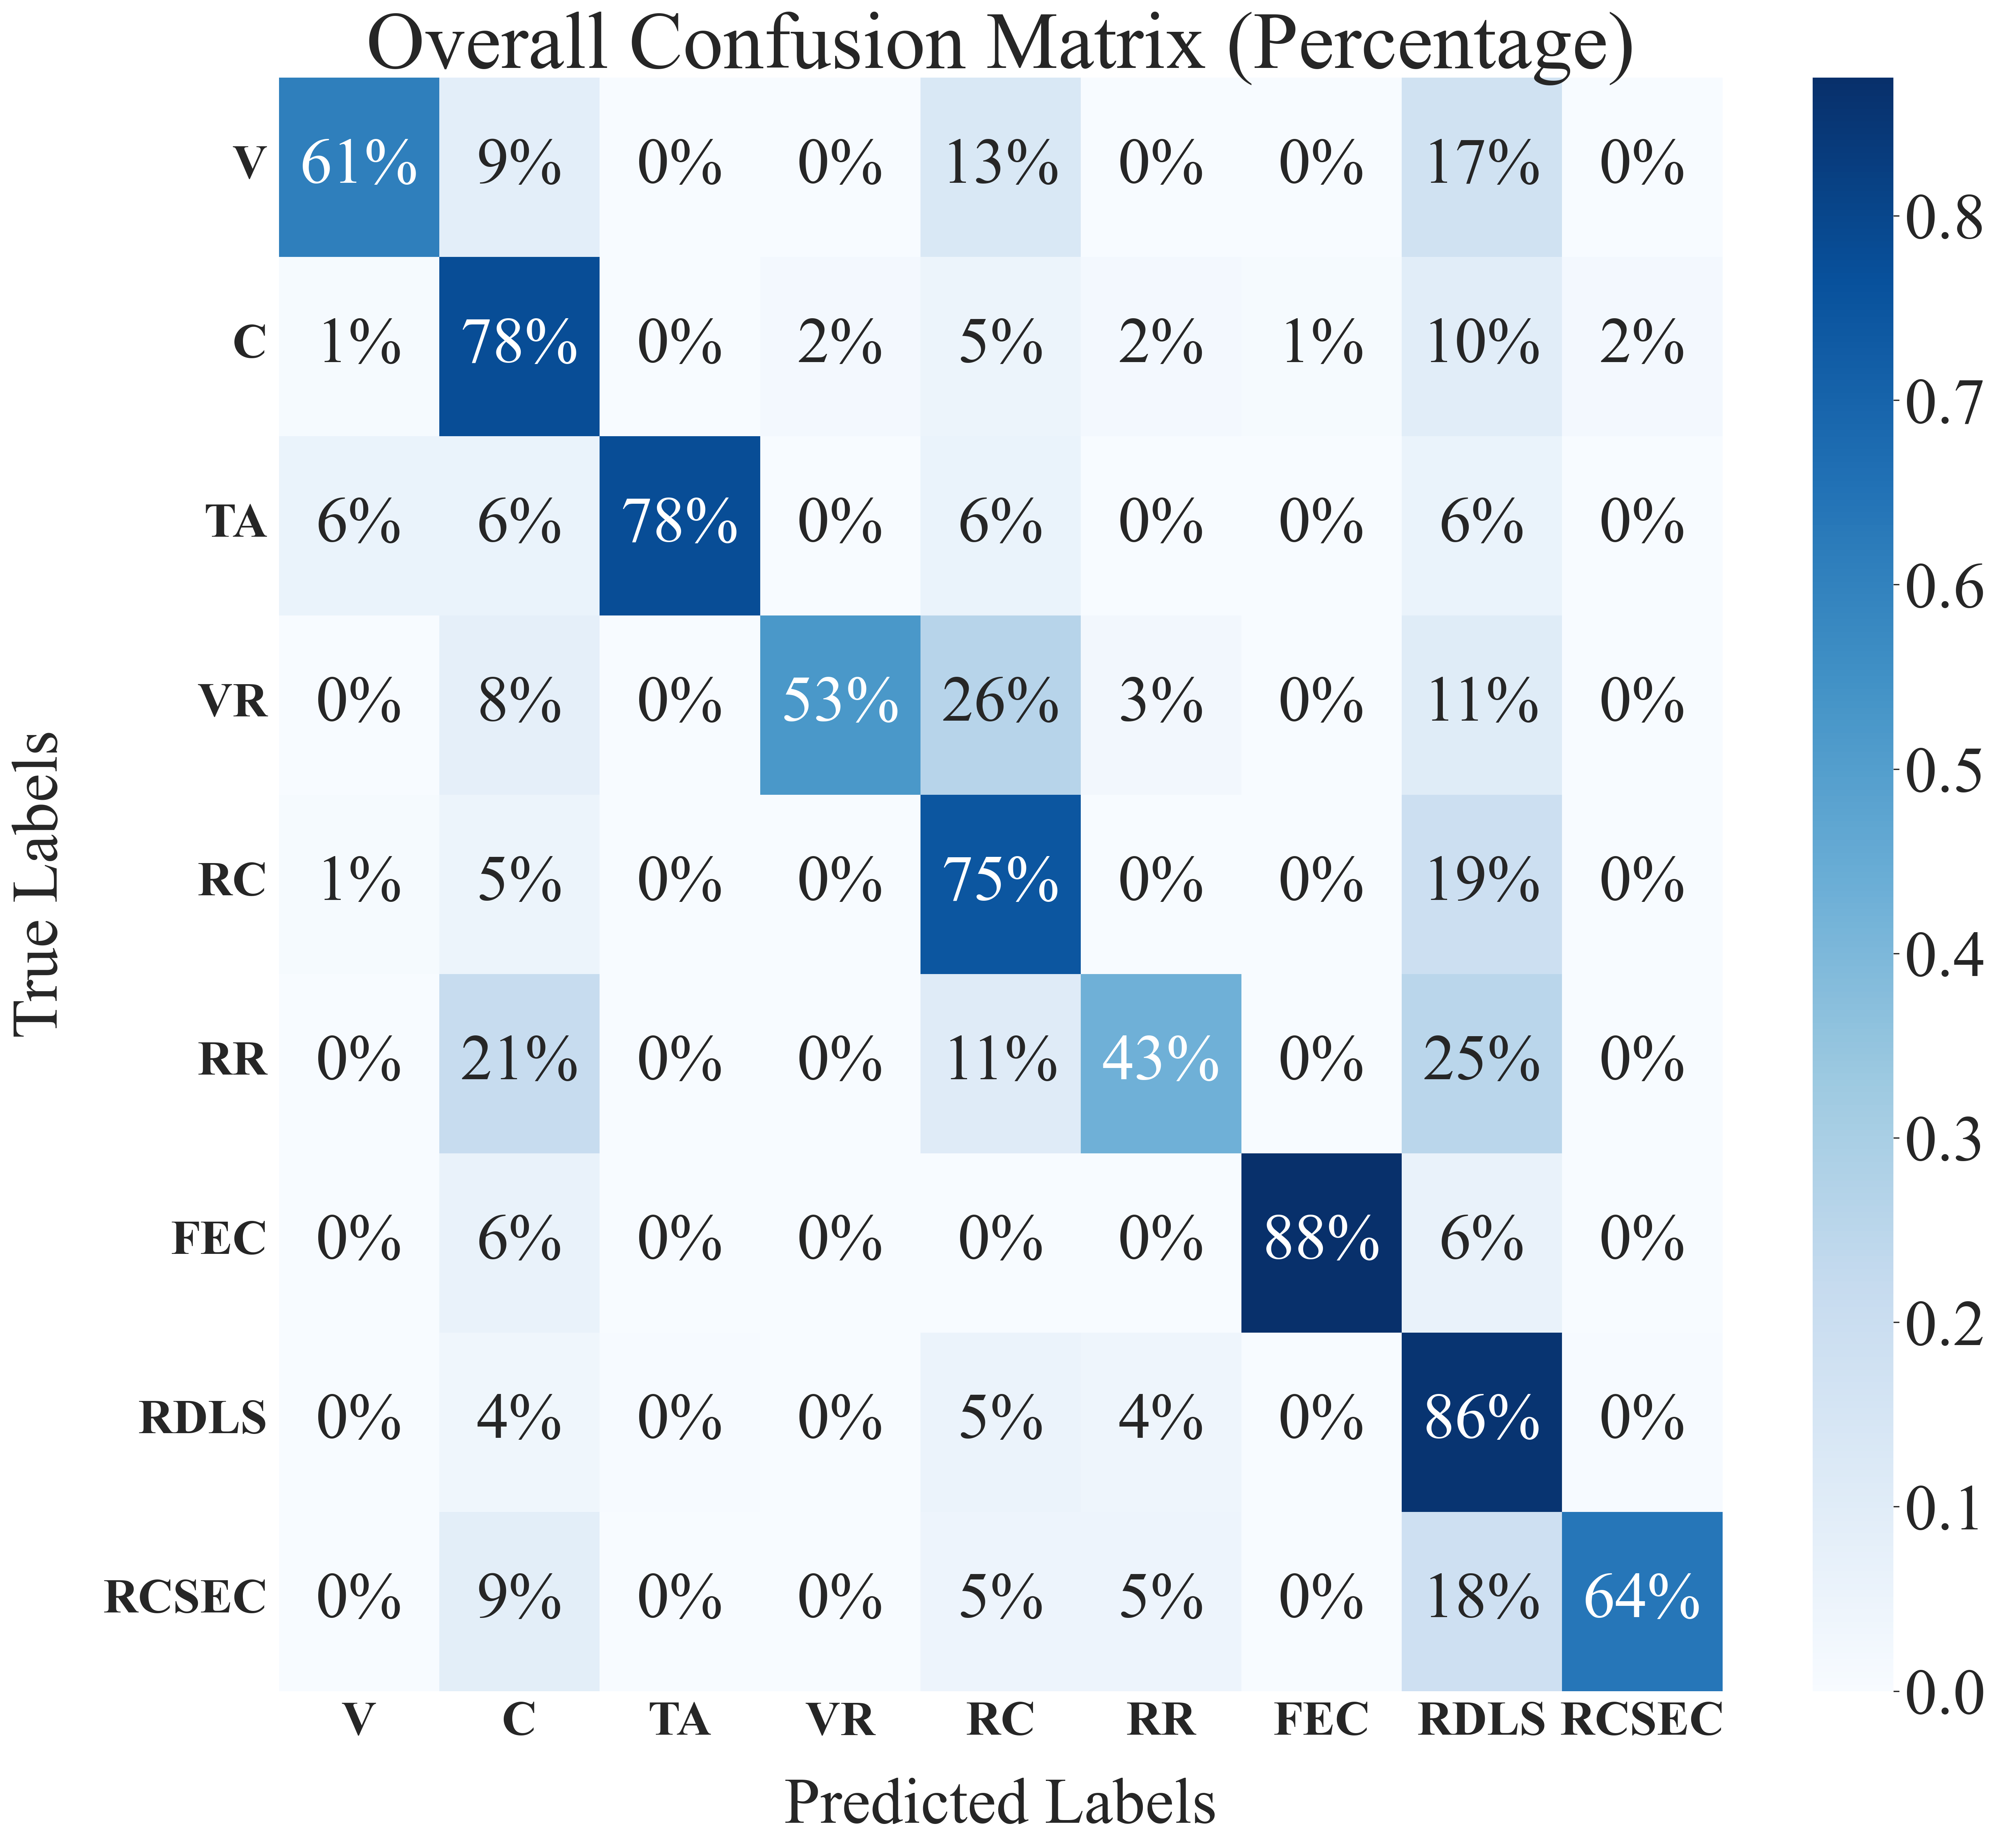

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = 'SimSun'
plt.rcParams['font.family']='Times New Roman ,SimSun '# 设置字体族，中文为SimSun，英文为Times New Roman
plt.rcParams['figure.dpi'] = 300

classes = ['VR','RDLS','RC','V','RR','RCSEC','C','TA','FEC']
# V,C,TA,VR,RC,RR,FEC,RDLS,RCSEC
# 定义新的顺序
desired_order = ['V', 'C', 'TA', 'VR', 'RC', 'RR', 'FEC', 'RDLS', 'RCSEC']
row_indices = [classes.index(cls) for cls in desired_order]
cm_overall_reordered = cm_overall[row_indices][:, row_indices]

# 绘制热力图
plt.figure(figsize=(20, 18))
heatmap = sns.heatmap(cm_overall_reordered / cm_overall_reordered.sum(axis=1)[:, np.newaxis], annot=True, fmt='.0%', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order, annot_kws={'size': 40})
# plt.title('Overall Confusion Matrix (Percentage)', fontsize=40)
plt.xlabel('Predicted Labels', fontsize=40, labelpad=20)
plt.ylabel('True Labels', fontsize=40, labelpad=20)
plt.title('Overall Confusion Matrix (Percentage)', fontsize=50)
# 设置横轴和纵轴标签字体大小
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=30,weight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=30, weight='bold',  rotation=0)
# 获取图例对象
colorbar = heatmap.collections[0].colorbar

# 设置图例标签的大小
colorbar.ax.tick_params(labelsize=40)
plt.show()